In [1]:
#from plotchecker import LinePlotChecker, ScatterPlotChecker, BarPlotChecker  # for testing use only
#import matplotcheck.base as mpc     # for testing use only
#import matplotcheck.notebook as nb  # for testing use only
import os                           # for testing use only
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
%matplotlib inline
#from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# loading csv for supervised learning
# we had manually added another data column of 'Other beverages'
df = pd.read_csv("data_for_lr_1.csv")

In [3]:
df

,Country,Year,Beer consumption,Wine consumption,Spirit consumption,Other beverages consumption,Total consumption
0,Afghanistan,2019,0.00,0.00,0.01,0.00,0.01
1,Afghanistan,2018,0.00,0.00,0.01,0.00,0.01
2,Afghanistan,2017,0.00,0.00,0.01,0.00,0.01
3,Afghanistan,2016,0.00,0.00,0.01,0.00,0.01
4,Afghanistan,2015,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...
10792,Zimbabwe,1965,0.22,0.04,0.75,3.86,4.87
10793,Zimbabwe,1964,0.21,0.04,0.38,3.92,4.56
10794,Zimbabwe,1963,0.25,0.05,0.39,3.94,4.63
10795,Zimbabwe,1962,0.24,0.02,0.40,4.39,5.05


<AxesSubplot:>

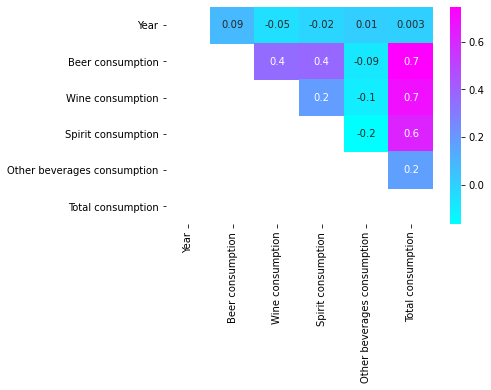

In [4]:
# using heatmap to understand feature relations to the total value that we want to predict

mask = np.tril(df.corr())
sns.heatmap(df.corr(), fmt='.1g', annot=True, cmap= 'cool', mask=mask)

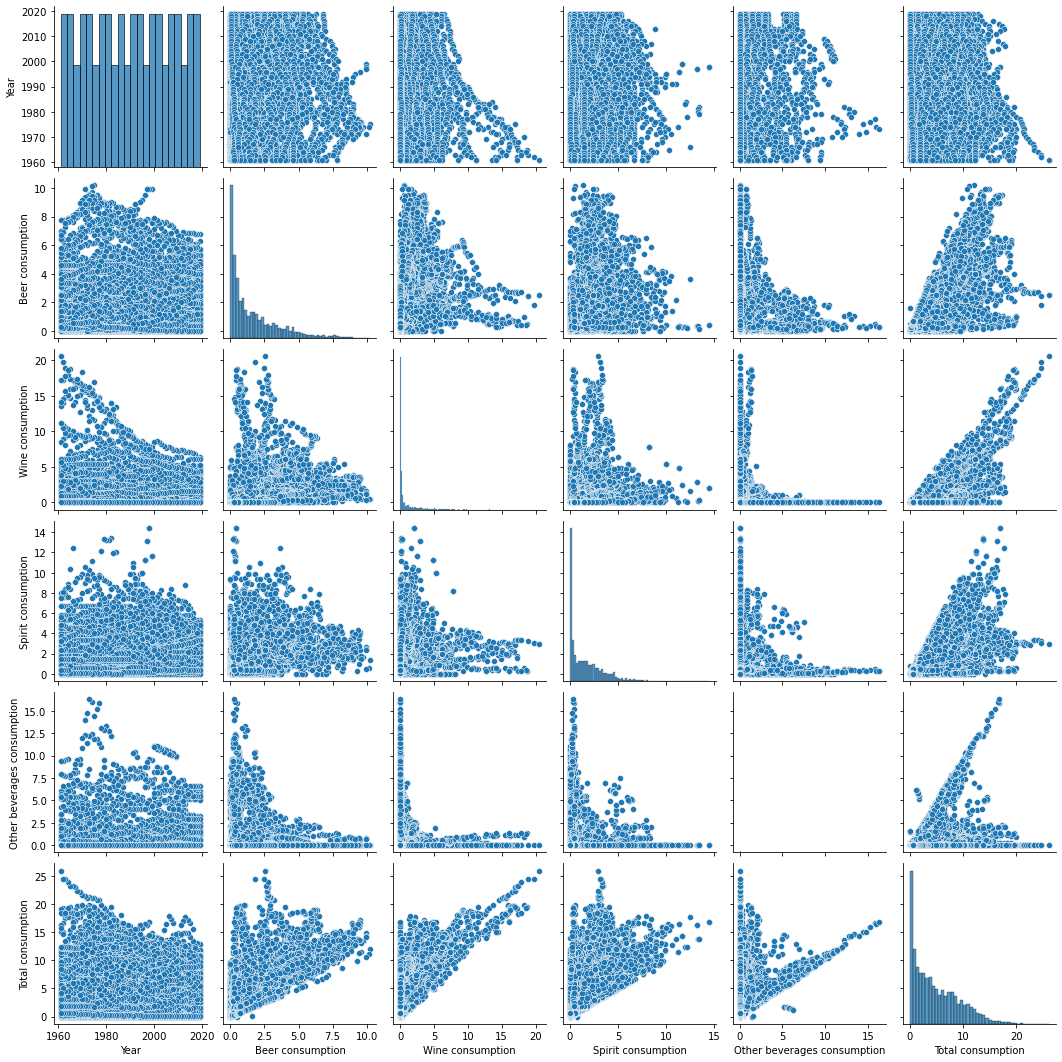

In [5]:
# additional display to visualize feature trends
sns.pairplot(df)

In [6]:
# feature engineering - creating complex features for better prediction results
df['Beer x Wine']=df['Beer consumption']*df['Wine consumption']
df['Beer x Spirit']=df['Beer consumption']*df['Spirit consumption']
df['Wine x Spirit']=df['Wine consumption']*df['Spirit consumption']
df['Beer x Wine x Spirit']=df['Beer consumption']*df['Wine consumption']*df['Spirit consumption']

df = df[['Country','Year','Beer consumption','Wine consumption','Spirit consumption',"Other beverages consumption",'Beer x Wine','Beer x Spirit',
         'Wine x Spirit','Beer x Wine x Spirit','Total consumption']]
df

,Country,Year,Beer consumption,Wine consumption,Spirit consumption,Other beverages consumption,Beer x Wine,Beer x Spirit,Wine x Spirit,Beer x Wine x Spirit,Total consumption
0,Afghanistan,2019,0.00,0.00,0.01,0.00,0.0000,0.0000,0.0000,0.000000,0.01
1,Afghanistan,2018,0.00,0.00,0.01,0.00,0.0000,0.0000,0.0000,0.000000,0.01
2,Afghanistan,2017,0.00,0.00,0.01,0.00,0.0000,0.0000,0.0000,0.000000,0.01
3,Afghanistan,2016,0.00,0.00,0.01,0.00,0.0000,0.0000,0.0000,0.000000,0.01
4,Afghanistan,2015,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...
10792,Zimbabwe,1965,0.22,0.04,0.75,3.86,0.0088,0.1650,0.0300,0.006600,4.87
10793,Zimbabwe,1964,0.21,0.04,0.38,3.92,0.0084,0.0798,0.0152,0.003192,4.56
10794,Zimbabwe,1963,0.25,0.05,0.39,3.94,0.0125,0.0975,0.0195,0.004875,4.63
10795,Zimbabwe,1962,0.24,0.02,0.40,4.39,0.0048,0.0960,0.0080,0.001920,5.05


<AxesSubplot:>

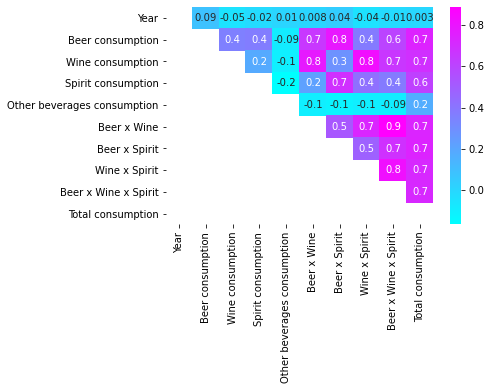

In [7]:
# checking the effect of the added features
mask = np.tril(df.corr())
sns.heatmap(df.corr(), fmt='.1g', annot=True, cmap= 'cool', mask=mask)

In [8]:
df_per_country = np.array_split(df, 183) #spliting the df to array per country.

In [9]:
# linear regression algorithm, using 70% of the comsumption data from 1961 - 2010 for training, 30% for testing
# divition was done manually and not by train_test_split since there is a meaning to which lines are used for
# training and which are used for testing
# prediction will be performed on comsumption data from 2011 - 2019

def supervised_algorithem():
    r2_cnt_list = list() # list of r^2 values.
    y_pred_per_country = list() 
    lr_per_country = list() 
    
    z_pred_per_country = list() # for years 2011-2019
    
    for country in df_per_country:
        lr = linear_model.LinearRegression() # create a linear regression object

        # scikit-learn doesn't work as well with pandas, so we have to extract values
        x = (country.iloc[9:])[['Beer consumption','Wine consumption','Spirit consumption','Other beverages consumption','Beer x Wine','Beer x Spirit','Wine x Spirit','Beer x Wine x Spirit']].values.reshape((country.iloc[9:])[['Beer consumption','Wine consumption','Spirit consumption','Other beverages consumption','Beer x Wine','Beer x Spirit','Wine x Spirit','Beer x Wine x Spirit']].shape[0],8)
        y = (country.iloc[9:])['Total consumption'].values.reshape((country.iloc[9:])['Total consumption'].shape[0],1)

        x_train = x[15:]
        x_test = x[:15]
        y_train = y[15:]
        y_test = y[:15]

        lr_pred = lr.fit(X=x_train, y=y_train);

        y_test_pred = lr.predict(x_test)
        y_pred_per_country.append(lr.predict(x_test))
        
        # z parmeter for predicting 2011-2019
        z= (country.iloc[:9])[['Beer consumption','Wine consumption','Spirit consumption','Other beverages consumption','Beer x Wine','Beer x Spirit','Wine x Spirit','Beer x Wine x Spirit']].values.reshape((country.iloc[:9])[['Beer consumption','Wine consumption','Spirit consumption','Other beverages consumption','Beer x Wine','Beer x Spirit','Wine x Spirit','Beer x Wine x Spirit']].shape[0],8)
        z_pred_per_country.append(lr.predict(z)) 
                       
        #print("Slope:",lr.coef_)
        #print("Intercept:",lr.intercept_)
        r2_cnt_list.append(r2_score(y_test, y_test_pred))
        #print("R2:",r2_score(y_test, y_test_pred)) 
        #print(lr)
    return r2_cnt_list,y_pred_per_country,z_pred_per_country 

In [10]:
r2_cnt_list, y_pred_per_country, z_pred_per_country = supervised_algorithem()

In [11]:
# r^2 indicator to measure the accuracy of the model
r2_cnt_list 

# some countries have bad correlation results that damage our model's performance
# we will remove them

[-0.5709459459459458,
 -10.543756421766913,
 0.9912394394166076,
 0.9999553997147428,
 0.9580963616583275,
 0.945867198738926,
 0.7239306142690325,
 -9.0682406225909,
 0.9998817398434237,
 0.9331523241907019,
 0.9994675719356784,
 -0.5684792391175231,
 -0.0009886307464157529,
 0.937258988579642,
 -3143.478972993876,
 0.9988935628116942,
 0.9998815841371523,
 -15.083751564411937,
 0.9826550849477376,
 0.9937169027610708,
 0.9590875515713333,
 0.9958577206556077,
 0.9947003107711534,
 0.998102700093058,
 0.9901021097011375,
 -1.7403688997001692,
 0.6025888731327794,
 0.9864525234036856,
 -2.515958062510961,
 0.9999320384987641,
 0.19833354849238416,
 -5.529258670147168,
 0.9975035908375237,
 0.999515356970658,
 0.9893035103910127,
 0.9991945789626492,
 -8.90718934949549,
 -0.7885995157384205,
 0.9494256445930839,
 -0.2753421994647429,
 0.8160451890203694,
 0.9898495720312579,
 0.9999820944949318,
 0.9997810533824744,
 0.9994141948296189,
 0.9966629043782324,
 0.9971529359056022,
 0.99032

In [12]:
# handling problematic data - remove countries that has r^2 < 0.7

run_range=len(r2_cnt_list)
i = 0
for r2 in range(run_range):   
    if (r2_cnt_list[r2] < 0.7):
        df_per_country.pop(r2-i)
        i+=1
        

#print(183-cnt)
# 45 problematic without all the "Others" multiplication features
# 55 problematic with all "Others" multiplication features

In [13]:
# running the model again on the cleaned countries df, checking new r^2 per country
r2_cnt_list, y_pred_per_country, z_pred_per_country = supervised_algorithem()
r2_cnt_list

[0.9912394394166076,
 0.9999553997147428,
 0.9580963616583275,
 0.945867198738926,
 0.7239306142690325,
 0.9998817398434237,
 0.9331523241907019,
 0.9994675719356784,
 0.937258988579642,
 0.9988935628116942,
 0.9998815841371523,
 0.9826550849477376,
 0.9937169027610708,
 0.9590875515713333,
 0.9958577206556077,
 0.9947003107711534,
 0.998102700093058,
 0.9901021097011375,
 0.9864525234036856,
 0.9999320384987641,
 0.9975035908375237,
 0.999515356970658,
 0.9893035103910127,
 0.9991945789626492,
 0.9494256445930839,
 0.8160451890203694,
 0.9898495720312579,
 0.9999820944949318,
 0.9997810533824744,
 0.9994141948296189,
 0.9966629043782324,
 0.9971529359056022,
 0.9903290212795905,
 0.9977045279403978,
 0.9981809797227034,
 0.9706595819521636,
 0.9977090036733973,
 0.9986624937308471,
 0.8161099797698416,
 0.9582408228566569,
 0.9980520896878852,
 0.9982007851868653,
 0.9009804812065786,
 1.0,
 0.9982047994236747,
 0.9997962715247521,
 0.8843564613266638,
 0.9998523658374547,
 0.86955254

In [14]:
# calculating mean r^2 value for understanding accuracy, no need to run

sum_ = 0
cnt =0
for a in r2_cnt_list:
    sum_ = sum_ +a 
    cnt = cnt +1
mean = sum_/cnt
mean

0.9610534543634295

In [15]:
# total consmption prediction data for 2011 - 2019 
z_pred_per_country

[array([[0.59738694],
        [0.59738694],
        [0.5896814 ],
        [0.585084  ],
        [0.55595237],
        [0.55971017],
        [0.52623859],
        [0.45336517],
        [0.42285203]]),
 array([[5.852241  ],
        [6.15963497],
        [6.1827848 ],
        [6.10369713],
        [6.53847384],
        [8.13350424],
        [7.70656631],
        [7.85806421],
        [7.69778377]]),
 array([[11.44317152],
        [10.83869176],
        [10.46474719],
        [ 9.48993622],
        [ 8.80209312],
        [ 9.39193992],
        [ 9.16148556],
        [ 7.94488905],
        [ 6.96664884]]),
 array([[7.28746122],
        [7.28746122],
        [7.54141262],
        [7.58502639],
        [7.66813809],
        [7.19129263],
        [7.44330697],
        [7.36097684],
        [7.17663186]]),
 array([[4.22028325],
        [4.23199336],
        [4.35803055],
        [4.33787282],
        [4.76536473],
        [5.05039304],
        [4.50083192],
        [4.25563821],
        [4.5588

In [16]:
# adding the total consumption data for 2011 - 2019 from the original csv for comparison

total_from_data=list()
for country in df_per_country:
    y = (country.iloc[:9])['Total consumption'].values.reshape((country.iloc[:9])['Total consumption'].shape[0],1)
    total_from_data.append(y)
total_from_data



[array([[0.59],
        [0.59],
        [0.58],
        [0.58],
        [0.55],
        [0.54],
        [0.5 ],
        [0.43],
        [0.4 ]]),
 array([[5.84],
        [6.15],
        [6.16],
        [6.09],
        [6.53],
        [8.1 ],
        [7.67],
        [7.83],
        [7.66]]),
 array([[11.88],
        [11.28],
        [10.78],
        [ 9.75],
        [ 9.06],
        [ 9.66],
        [ 9.43],
        [ 8.22],
        [ 7.24]]),
 array([[7.95],
        [7.95],
        [8.29],
        [8.38],
        [8.49],
        [7.93],
        [8.27],
        [8.  ],
        [7.69]]),
 array([[3.77],
        [3.69],
        [3.83],
        [3.83],
        [4.04],
        [4.22],
        [3.92],
        [3.89],
        [4.07]]),
 array([[11.9],
        [11.6],
        [11.6],
        [11.7],
        [11.6],
        [12.4],
        [12.1],
        [12.1],
        [11.9]]),
 array([[1.38],
        [0.88],
        [0.44],
        [0.39],
        [0.51],
        [0.36],
        [0.52],
   

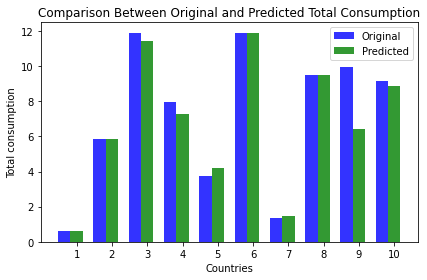

In [17]:
# creating a bar plot to observe results' accuracy 

temp_list = list ()
temp_list2 = list ()
for data in total_from_data[:10]:
    temp_list.append(data[0][0])

for data in z_pred_per_country[:10]:
    temp_list2.append(data[0][0])

    
# create plot
fig, ax = plt.subplots()
index = np.arange(len(temp_list))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, temp_list, bar_width, alpha=opacity, color='b', label='Original')

rects2 = plt.bar(index + bar_width, temp_list2, bar_width, alpha=opacity, color='g', label='Predicted')

plt.xlabel('Countries')
plt.ylabel('Total consumption')
plt.title('Comparison Between Original and Predicted Total Consumption')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.legend()

plt.tight_layout()
plt.show()
    

In [18]:
# calculating the trend of consumption change in the predicted years

delta_predict = list ()

for arr in z_pred_per_country:
        temp=arr[:8]-arr[1:]
        delta_predict.append(temp)

delta_predict

[array([[ 0.        ],
        [ 0.00770554],
        [ 0.0045974 ],
        [ 0.02913163],
        [-0.0037578 ],
        [ 0.03347158],
        [ 0.07287343],
        [ 0.03051314]]),
 array([[-0.30739397],
        [-0.02314983],
        [ 0.07908767],
        [-0.43477671],
        [-1.59503039],
        [ 0.42693792],
        [-0.15149789],
        [ 0.16028043]]),
 array([[ 0.60447977],
        [ 0.37394456],
        [ 0.97481098],
        [ 0.6878431 ],
        [-0.5898468 ],
        [ 0.23045436],
        [ 1.21659651],
        [ 0.97824021]]),
 array([[ 0.        ],
        [-0.2539514 ],
        [-0.04361378],
        [-0.08311169],
        [ 0.47684546],
        [-0.25201434],
        [ 0.08233013],
        [ 0.18434498]]),
 array([[-0.01171011],
        [-0.12603719],
        [ 0.02015773],
        [-0.42749191],
        [-0.28502831],
        [ 0.54956112],
        [ 0.24519371],
        [-0.30322665]]),
 array([[ 3.00000000e-01],
        [ 0.00000000e+00],
        [-1.0000

In [19]:
def Average(lst):
    return sum(lst) / len(lst)

def calc_average_delta(delta_predict):
    average_delta = list()
    for delta in delta_predict:
        average_delta.append(Average(delta))   
    return average_delta

average_delta = calc_average_delta(delta_predict)


In [20]:
year2019=list()
for pred in z_pred_per_country:    
    year2019.append(pred[:1][0])
year2019


[array([0.59738694]),
 array([5.852241]),
 array([11.44317152]),
 array([7.28746122]),
 array([4.22028325]),
 array([11.9]),
 array([1.49362787]),
 array([9.48739866]),
 array([6.44472511]),
 array([8.85618768]),
 array([5.95124343]),
 array([0.01]),
 array([2.95053554]),
 array([6.21765398]),
 array([5.98476545]),
 array([6.06559657]),
 array([0.69721259]),
 array([11.11349776]),
 array([4.70171144]),
 array([4.09336083]),
 array([0.56245377]),
 array([7.8]),
 array([4.52034358]),
 array([4.05135745]),
 array([2.99796114]),
 array([9.0096101]),
 array([4.71540164]),
 array([9.60586176]),
 array([12.73841042]),
 array([0.57545076]),
 array([9.16401142]),
 array([0.21615671]),
 array([6.20029231]),
 array([5.61883748]),
 array([3.05140275]),
 array([0.13630283]),
 array([2.94668017]),
 array([0.93]),
 array([10.48569511]),
 array([7.63406119]),
 array([1.15]),
 array([2.72597531]),
 array([8.07021392]),
 array([11.44]),
 array([6.4324904]),
 array([2.67625794]),
 array([10.56223686]),
 

In [21]:
# applying the calculated trend on the  predicted total consumption value of 2019 for the 2020 result

year2020 = np.add(year2019,average_delta)
year2020

array([[ 6.19203804e-01],
       [ 5.62154815e+00],
       [ 1.20027369e+01],
       [ 7.30131489e+00],
       [ 4.17796055e+00],
       [ 1.19000000e+01],
       [ 1.59251984e+00],
       [ 9.52029292e+00],
       [ 6.23256070e+00],
       [ 8.70124090e+00],
       [ 5.90506922e+00],
       [-1.00000000e-02],
       [ 2.90105792e+00],
       [ 6.33338080e+00],
       [ 5.95751860e+00],
       [ 5.93938974e+00],
       [ 6.71830887e-01],
       [ 1.12850568e+01],
       [ 4.66229189e+00],
       [ 3.86715311e+00],
       [ 5.56004646e-01],
       [ 7.89750000e+00],
       [ 4.42841261e+00],
       [ 4.02404892e+00],
       [ 2.98043840e+00],
       [ 8.78046499e+00],
       [ 4.76322399e+00],
       [ 9.46744113e+00],
       [ 1.27608673e+01],
       [ 5.56276266e-01],
       [ 9.01323838e+00],
       [ 1.94089734e-01],
       [ 5.77448315e+00],
       [ 5.63530479e+00],
       [ 2.93555260e+00],
       [ 1.31613974e-01],
       [ 3.02537209e+00],
       [ 8.97500000e-01],
       [ 1.0

In [22]:
# saving results of total consumption per country in 2020 to a csv

country_list = list()
newyear_list = list()
for country in df_per_country:
    country_list.append(country.iloc[0][0])
for country in year2020:
    if(country[0] < 0):
         newyear_list.append('0') # if the total consumption is less then change to fixed number 0
    else:
        newyear_list.append(round(country[0],3)) # else just use the number

In [23]:
newyear_list

[0.619,
 5.622,
 12.003,
 7.301,
 4.178,
 11.9,
 1.593,
 9.52,
 6.233,
 8.701,
 5.905,
 '0',
 2.901,
 6.333,
 5.958,
 5.939,
 0.672,
 11.285,
 4.662,
 3.867,
 0.556,
 7.897,
 4.428,
 4.024,
 2.98,
 8.78,
 4.763,
 9.467,
 12.761,
 0.556,
 9.013,
 0.194,
 5.774,
 5.635,
 2.936,
 0.132,
 3.025,
 0.897,
 10.026,
 7.729,
 1.239,
 2.779,
 7.867,
 11.326,
 6.244,
 2.672,
 10.466,
 6.174,
 9.056,
 1.631,
 0.342,
 4.87,
 3.602,
 2.718,
 10.718,
 7.83,
 2.962,
 0.077,
 0.019,
 0.131,
 10.867,
 3.76,
 7.609,
 3.14,
 8.334,
 0.233,
 2.561,
 1.709,
 0.417,
 3.587,
 8.982,
 1.118,
 3.705,
 3.068,
 10.068,
 10.857,
 0.878,
 0.669,
 8.187,
 0.004,
 3.05,
 3.805,
 0.52,
 1.532,
 2.798,
 8.134,
 8.892,
 3.738,
 0.115,
 4.706,
 4.088,
 3.63,
 5.803,
 0.472,
 6.649,
 1.353,
 5.37,
 5.925,
 11.013,
 0.869,
 6.471,
 8.855,
 7.632,
 4.063,
 0.0,
 0.256,
 9.491,
 3.205,
 1.809,
 10.269,
 11.776,
 1.227,
 7.212,
 7.481,
 10.966,
 2.491,
 6.531,
 6.976,
 8.731,
 0.071,
 0.877,
 7.5,
 0.419,
 1.435,
 5.829,
 1.1

## Supervised Learning for USA data
#### at the end we will merge the data to one df with all of the countries.

In [24]:
# loading USA csv for supervised learning
# the whole process was performed for the USA alcohol consumption data csv as well
# this csv has consumption data of the years 1977 - 2019

df2 = pd.read_csv("united_states_data_for_lr.csv")
df2

,Unnamed: 0,Country,Year,Beer consumption,Wine consumption,Spirit consumption,Total consumption
0,0,Alabama,2019,1.02,0.26,0.71,2.00
1,1,Alabama,2018,1.04,0.26,0.69,1.99
2,2,Alabama,2017,1.07,0.26,0.67,2.00
3,3,Alabama,2016,1.09,0.26,0.65,2.01
4,4,Alabama,2015,1.11,0.26,0.64,2.01
...,...,...,...,...,...,...,...
2188,2188,Wyoming,1981,1.91,0.24,1.27,3.43
2189,2189,Wyoming,1980,1.85,0.24,1.32,3.41
2190,2190,Wyoming,1979,1.86,0.22,1.30,3.39
2191,2191,Wyoming,1978,1.81,0.22,1.35,3.38


<AxesSubplot:>

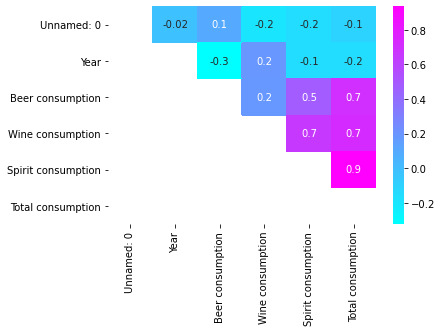

In [25]:
mask = np.tril(df2.corr())
sns.heatmap(df2.corr(), fmt='.1g', annot=True, cmap= 'cool', mask=mask)

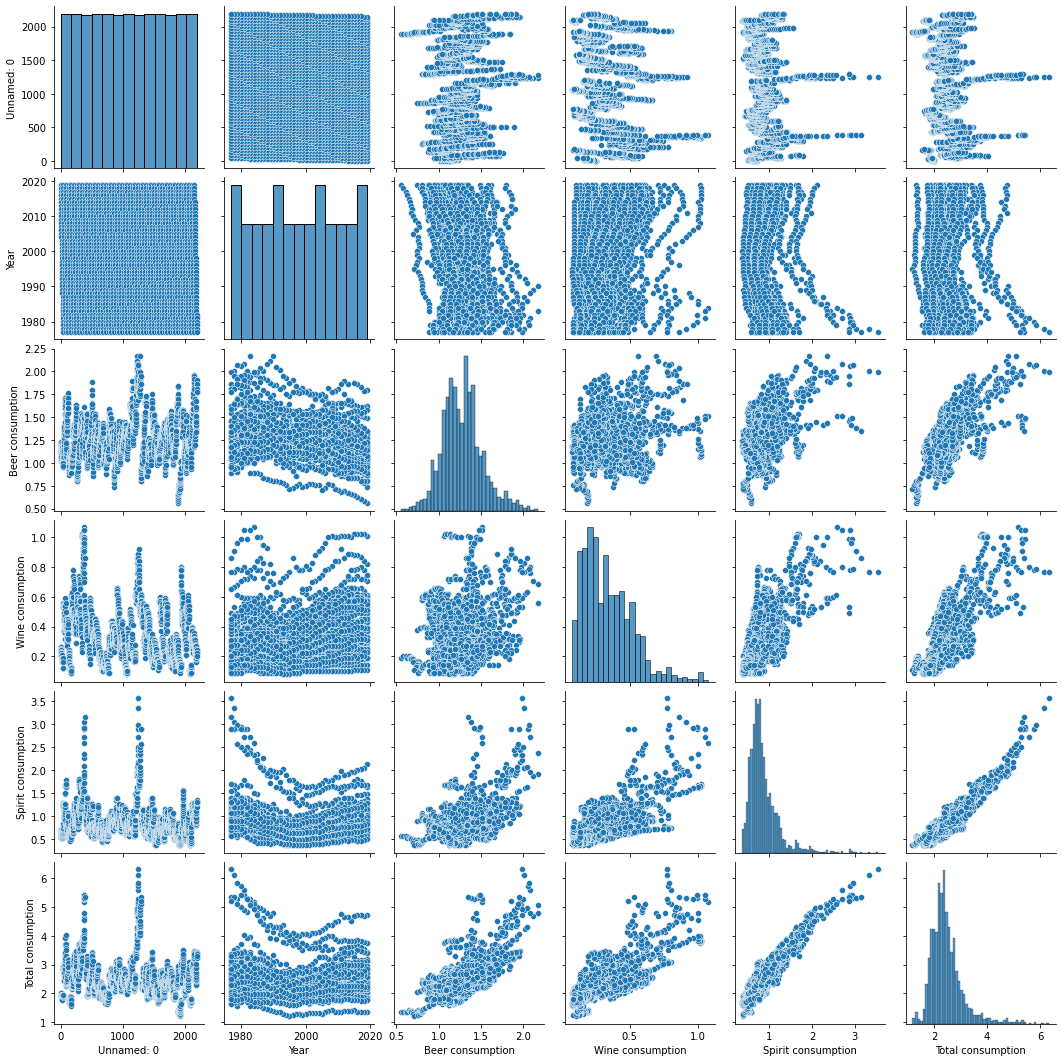

In [26]:
sns.pairplot(df2)

In [27]:
df2['Beer x Wine']=df2['Beer consumption']*df2['Wine consumption']
df2['Beer x Spirit']=df2['Beer consumption']*df2['Spirit consumption']
df2['Wine x Spirit']=df2['Wine consumption']*df2['Spirit consumption']
df2['Beer x Wine x Spirit']=df2['Beer consumption']*df2['Wine consumption']*df2['Spirit consumption']

df2 = df2[['Country','Year','Beer consumption','Wine consumption','Spirit consumption','Beer x Wine','Beer x Spirit',
         'Wine x Spirit','Beer x Wine x Spirit','Total consumption']]
df2

,Country,Year,Beer consumption,Wine consumption,Spirit consumption,Beer x Wine,Beer x Spirit,Wine x Spirit,Beer x Wine x Spirit,Total consumption
0,Alabama,2019,1.02,0.26,0.71,0.2652,0.7242,0.1846,0.188292,2.00
1,Alabama,2018,1.04,0.26,0.69,0.2704,0.7176,0.1794,0.186576,1.99
2,Alabama,2017,1.07,0.26,0.67,0.2782,0.7169,0.1742,0.186394,2.00
3,Alabama,2016,1.09,0.26,0.65,0.2834,0.7085,0.1690,0.184210,2.01
4,Alabama,2015,1.11,0.26,0.64,0.2886,0.7104,0.1664,0.184704,2.01
...,...,...,...,...,...,...,...,...,...,...
2188,Wyoming,1981,1.91,0.24,1.27,0.4584,2.4257,0.3048,0.582168,3.43
2189,Wyoming,1980,1.85,0.24,1.32,0.4440,2.4420,0.3168,0.586080,3.41
2190,Wyoming,1979,1.86,0.22,1.30,0.4092,2.4180,0.2860,0.531960,3.39
2191,Wyoming,1978,1.81,0.22,1.35,0.3982,2.4435,0.2970,0.537570,3.38


<AxesSubplot:>

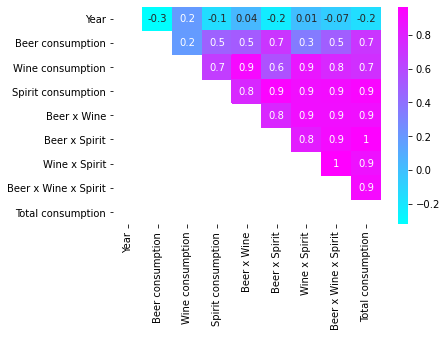

In [28]:
mask = np.tril(df2.corr())
sns.heatmap(df2.corr(), fmt='.1g', annot=True, cmap= 'cool', mask=mask)

In [29]:
df2_per_country = np.array_split(df2, 51)

df2_per_country[0].iloc[5:]

,Country,Year,Beer consumption,Wine consumption,Spirit consumption,Beer x Wine,Beer x Spirit,Wine x Spirit,Beer x Wine x Spirit,Total consumption
5,Alabama,2014,1.13,0.25,0.62,0.2825,0.7006,0.1550,0.175150,2.00
6,Alabama,2013,1.14,0.25,0.60,0.2850,0.6840,0.1500,0.171000,1.99
7,Alabama,2012,1.16,0.24,0.60,0.2784,0.6960,0.1440,0.167040,2.00
8,Alabama,2011,1.16,0.24,0.59,0.2784,0.6844,0.1416,0.164256,1.98
9,Alabama,2010,1.17,0.23,0.58,0.2691,0.6786,0.1334,0.156078,1.98
10,Alabama,2009,1.19,0.22,0.57,0.2618,0.6783,0.1254,0.149226,1.98
11,Alabama,2008,1.22,0.22,0.57,0.2684,0.6954,0.1254,0.152988,2.01
12,Alabama,2007,1.23,0.22,0.55,0.2706,0.6765,0.1210,0.148830,2.00
13,Alabama,2006,1.21,0.21,0.54,0.2541,0.6534,0.1134,0.137214,1.95
14,Alabama,2005,1.18,0.20,0.53,0.2360,0.6254,0.1060,0.125080,1.91


In [30]:
def supervised_algorithem_for_us():
    r2_cnt_list = list()
    y_pred_per_country = list()
    z_pred_per_country = list()
    for country in df2_per_country:
        lr = linear_model.LinearRegression() # create a linear regression object

        # scikit-learn doesn't work as well with pandas, so we have to extract values 
        x = (country.iloc[5:])[['Beer consumption','Wine consumption','Spirit consumption','Beer x Wine','Beer x Spirit','Wine x Spirit','Beer x Wine x Spirit']].values.reshape((country.iloc[5:])[['Beer consumption','Wine consumption','Spirit consumption','Beer x Wine','Beer x Spirit','Wine x Spirit','Beer x Wine x Spirit']].shape[0],7)
        y = (country.iloc[5:])['Total consumption'].values.reshape((country.iloc[5:])['Total consumption'].shape[0],1)

        x_train = x[11:]
        x_test = x[:11]
        y_train = y[11:]
        y_test = y[:11]

        lr_pred = lr.fit(X=x_train, y=y_train);

        y_test_pred = lr.predict(x_test)
        y_pred_per_country.append(lr.predict(x_test))
        
        z= (country.iloc[:5])[['Beer consumption','Wine consumption','Spirit consumption','Beer x Wine','Beer x Spirit','Wine x Spirit','Beer x Wine x Spirit']].values.reshape((country.iloc[:5])[['Beer consumption','Wine consumption','Spirit consumption','Beer x Wine','Beer x Spirit','Wine x Spirit','Beer x Wine x Spirit']].shape[0],7)
        z_pred_per_country.append(lr.predict(z)) 
        
        #print("Slope:",lr.coef_)
        #print("Intercept:",lr.intercept_)
        r2_cnt_list.append(r2_score(y_test, y_test_pred))
        #print("R2:",r2_score(y_test, y_test_pred)) 
    return r2_cnt_list,y_pred_per_country,z_pred_per_country

In [31]:
us_r2_cnt_list, us_y_pred_per_country, us_z_pred_per_country = supervised_algorithem_for_us()

In [32]:
us_r2_cnt_list

[0.6245850800000374,
 0.9978653339546641,
 0.9543613619217095,
 0.8184795386101706,
 0.9811820332648101,
 0.9126386585343094,
 0.983880098498973,
 0.9952967017231094,
 0.9931200043409406,
 0.9724291602020185,
 0.6188674655226849,
 0.9797371803288897,
 0.7425426024560391,
 0.8890789928036457,
 -0.5847100826435914,
 0.9763083560362865,
 0.8268593768002139,
 -0.4053257770156966,
 0.986502439734948,
 0.9948013868250389,
 -17.205023994910018,
 -0.25779862486621985,
 0.053450778403104415,
 0.05521891154446901,
 -0.9358974798857087,
 -12.210355224192224,
 0.9968204354006367,
 0.9017953860583043,
 0.9939035690704648,
 0.9905826412117329,
 0.270363870777236,
 0.8615944949244977,
 0.9906557273112718,
 0.24073332342017928,
 0.9769737305473755,
 -0.4840095672731992,
 0.9501473171563969,
 0.9750158434849688,
 0.9824240642253994,
 0.9768318673397159,
 0.9540954805368052,
 -1.815620393306252,
 0.886908549559739,
 -1.046521590087297,
 0.025592829839575892,
 0.9971812443200077,
 0.8307113646014597,
 0.

In [33]:
len(df2_per_country)

51

In [34]:
run_range=len(us_r2_cnt_list)
i = 0
for r2 in range(run_range):
    if (us_r2_cnt_list[r2] < 0.7):
        df2_per_country.pop(r2-i)
        i+=1
len(df2_per_country) # printing the number of countires after removing problematic countries

34

In [35]:
us_r2_cnt_list, us_y_pred_per_country, us_z_pred_per_country = supervised_algorithem_for_us()

In [36]:
us_r2_cnt_list # checking r^2 values

[0.9978653339546641,
 0.9543613619217095,
 0.8184795386101706,
 0.9811820332648101,
 0.9126386585343094,
 0.983880098498973,
 0.9952967017231094,
 0.9931200043409406,
 0.9724291602020185,
 0.9797371803288897,
 0.7425426024560391,
 0.8890789928036457,
 0.9763083560362865,
 0.8268593768002139,
 0.986502439734948,
 0.9948013868250389,
 0.9968204354006367,
 0.9017953860583043,
 0.9939035690704648,
 0.9905826412117329,
 0.8615944949244977,
 0.9906557273112718,
 0.9769737305473755,
 0.9501473171563969,
 0.9750158434849688,
 0.9824240642253994,
 0.9768318673397159,
 0.9540954805368052,
 0.886908549559739,
 0.9971812443200077,
 0.8307113646014597,
 0.862999157619616,
 0.9507708924631476,
 0.8203411170645367]

In [37]:
sum_ = 0
cnt =0
for a in us_r2_cnt_list:
    sum_ = sum_ +a 
    cnt = cnt +1
mean = sum_/cnt
mean

0.9383775326156422

In [38]:
us_delta_predict = list ()
for arr in us_z_pred_per_country:
        temp=arr[:4]-arr[1:]
        us_delta_predict.append(temp)

In [39]:
us_average_delta = calc_average_delta(us_delta_predict)
us_average_delta

[array([0.0091865]),
 array([-0.02394271]),
 array([-0.01377112]),
 array([0.0692709]),
 array([0.00042113]),
 array([0.02478675]),
 array([-0.05413486]),
 array([-0.01471964]),
 array([0.01606454]),
 array([0.01304545]),
 array([-0.0219511]),
 array([0.0131917]),
 array([-0.00645444]),
 array([0.01289782]),
 array([-0.00403889]),
 array([0.02590812]),
 array([0.01928641]),
 array([-0.02671834]),
 array([0.01114129]),
 array([0.00556115]),
 array([0.03681757]),
 array([0.01062199]),
 array([-0.01490767]),
 array([-0.00922325]),
 array([0.00209909]),
 array([0.01556389]),
 array([0.01150973]),
 array([-0.02514337]),
 array([0.03993789]),
 array([0.00480887]),
 array([0.00619229]),
 array([-0.01250913]),
 array([-0.00886057]),
 array([0.0137908])]

In [40]:
us_total_from_data=list()
for country in df2_per_country:
    y = (country.iloc[:5])['Total consumption'].values.reshape((country.iloc[:5])['Total consumption'].shape[0],1)
    us_total_from_data.append(y)
us_total_from_data

[array([[2.88],
        [2.86],
        [2.8 ],
        [2.94],
        [2.84]]),
 array([[2.24],
        [2.26],
        [2.29],
        [2.32],
        [2.34]]),
 array([[1.81],
        [1.78],
        [1.82],
        [1.8 ],
        [1.83]]),
 array([[2.55],
        [2.52],
        [2.31],
        [2.34],
        [2.28]]),
 array([[2.79],
        [2.88],
        [2.84],
        [2.82],
        [2.77]]),
 array([[2.47],
        [2.4 ],
        [2.41],
        [2.44],
        [2.41]]),
 array([[3.44],
        [3.53],
        [3.62],
        [3.73],
        [3.66]]),
 array([[3.75],
        [3.78],
        [3.81],
        [3.84],
        [3.82]]),
 array([[2.71],
        [2.66],
        [2.67],
        [2.69],
        [2.64]]),
 array([[2.67],
        [2.66],
        [2.65],
        [2.64],
        [2.61]]),
 array([[2.04],
        [2.07],
        [2.1 ],
        [2.15],
        [2.17]]),
 array([[2.4 ],
        [2.39],
        [2.38],
        [2.32],
        [2.36]]),
 array([[2.39],


In [41]:
us_year2019=list()
for pred in us_z_pred_per_country:    
    us_year2019.append(pred[:1][0])
us_year2019

[array([2.8775589]),
 array([2.25837941]),
 array([1.80889971]),
 array([2.56359085]),
 array([2.79932936]),
 array([2.5229172]),
 array([3.41298433]),
 array([3.76390854]),
 array([2.67375498]),
 array([2.67049447]),
 array([2.11769217]),
 array([2.39822592]),
 array([2.30167289]),
 array([1.92675548]),
 array([2.57655755]),
 array([2.89415716]),
 array([3.17604608]),
 array([2.16451715]),
 array([3.40821889]),
 array([4.7496394]),
 array([2.26566517]),
 array([2.23373229]),
 array([3.28913256]),
 array([1.85288893]),
 array([2.73436858]),
 array([2.4019768]),
 array([2.54471818]),
 array([2.16701045]),
 array([2.26825108]),
 array([3.09900541]),
 array([2.17799822]),
 array([2.19552456]),
 array([1.74904865]),
 array([2.69156529])]

In [42]:
us_year2020 = np.add(us_year2019,us_average_delta)
us_year2020

array([[2.8867454 ],
       [2.23443671],
       [1.79512859],
       [2.63286175],
       [2.79975049],
       [2.54770395],
       [3.35884947],
       [3.7491889 ],
       [2.68981952],
       [2.68353992],
       [2.09574107],
       [2.41141762],
       [2.29521845],
       [1.9396533 ],
       [2.57251866],
       [2.92006528],
       [3.19533248],
       [2.13779881],
       [3.41936017],
       [4.75520055],
       [2.30248274],
       [2.24435428],
       [3.27422488],
       [1.84366567],
       [2.73646767],
       [2.41754069],
       [2.55622791],
       [2.14186708],
       [2.30818897],
       [3.10381428],
       [2.18419051],
       [2.18301543],
       [1.74018808],
       [2.70535609]])

In [43]:
len(newyear_list)

138

In [44]:
# saving results of total consumption per country in 2020 to a csv

for country in df2_per_country:
    country_list.append(country.iloc[0][0])
for country in us_year2020:
    if(country[0] < 0):
         newyear_list.append('0') # if the total consumption is less then 0 (change to fixed number 0)
    else:
        newyear_list.append(round(country[0],3)) # else just use the number.


df2020 = pd.DataFrame({'Country': country_list, 'Total consumption': newyear_list})
df2020.to_csv("year2020total.csv")

df2020

,Country,Total consumption
0,Algeria,0.619
1,Angola,5.622
2,Antigua and Barbuda,12.003
3,Argentina,7.301
4,Armenia,4.178
...,...,...
167,Vermont,3.104
168,Virginia,2.184
169,Washington,2.183
170,West Virginia,1.74
